In [1]:
import numpy as np
import pandas as pd

# String Manipulations

<b>String fomatting documentation:</b><br>
https://docs.python.org/3/library/string.html<br><br>
<b>General Python Information:</b><br>
https://docs.python.org/3.8/

Fields to be replaced within a string should be represented with {replacement value ! converions : format specs}

## Replacement Values Examples

In [79]:
firstName = 'Bob'
secondName = 'George'
names=[firstName, secondName]
namesDict={'first':'Bob','second':'George'}

In [1]:
print('Hello {0} my name is {1}'.format(firstName, secondName))
print('Hello {1} my name is {0}'.format(firstName, secondName))
print('Hello {} my name is {}'.format(firstName, secondName))
print('Hello {f} my name is {s}'.format(f='Bob', s='George'))
print('Hello {0[0]} my name is {0[1]}'.format(names))
print('Hello {n[0]} my name is {n[1]}'.format(n=names))
print('Hello {0[second]} my name is {0[second]}'.format(namesDict))
print('Hello {first} my name is {first}'.format(**namesDict))

NameError: name 'firstName' is not defined

## Conversion Examples

Additional arguements can be passed within the replacement field {} to convert replacement values to another representation
1. {!s} - converts replacement value to string
2. {!r} - converts replacement value to printable representation of an object
3. {!a} - returns a string containing a printable representation of an object, but escape the non-ASCII characters in the string returned by repr() using \x, \u or \U escapes

In [116]:
inputs=['30\n','George']
print('My name is {0[1]!r} and I\'m {0[0]!s} years old'.format(inputs))
print('My name is {0[1]!s} and I\'m {0[0]!r} years old'.format(inputs))
print('My name is {0[1]!s} and I\'m {0[0]!a} years old'.format(inputs))

My name is 'George' and I'm 30
 years old
My name is George and I'm '30\n' years old
My name is George and I'm '30\n' years old


## Formatting Examples

Lastly, formatting properties can be defined within {} as well

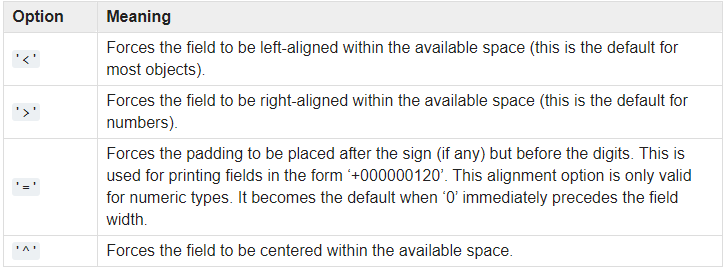

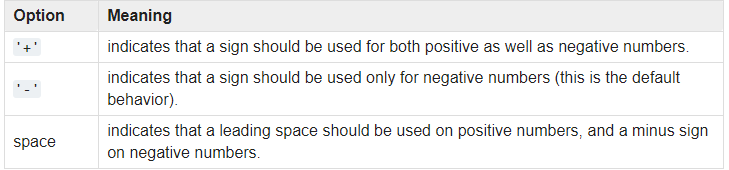

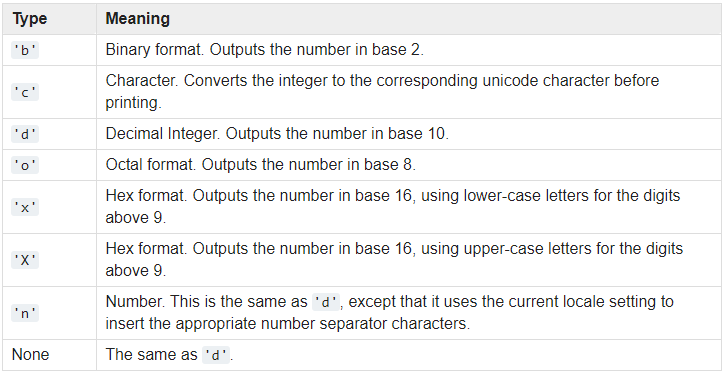

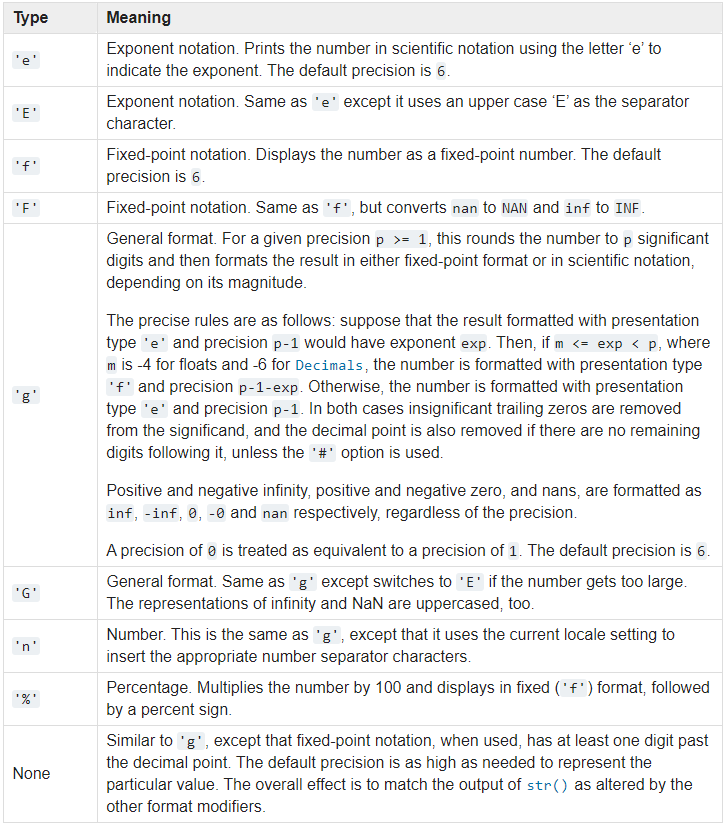

In [142]:
sales = 200
inventory = 500
price = 35.2758
print('This month we sold {!s} units and {:.2%} of our inventory,\nRevenue was ${:*^15,.2f}!'\
      .format(sales,sales/inventory, sales*price))

This month we sold 200 units and 40.00% of our inventory,
Revenue was $***7,055.16****!


# Apply / Applymap 

Pandas DF containts a styling definion when displayed styles are applied to the table.<br>
<b>Styles are of CSS format and the table can be formatted using CSS attributes, that can be found here:</b><br>
https://www.w3schools.com/cssref/

In [143]:
np.random.seed(100)
df = pd.DataFrame({'A': np.linspace(1, 10, 10)})
df = pd.concat([df, pd.DataFrame(np.random.randn(10, 4), columns=list('BCDE'))],
               axis=1)

In [144]:
df.style.highlight_null().render().split('\n')[:10]

['<style  type="text/css" >',
 '</style><table id="T_026b3488_ac16_11ea_b222_d46d6d2adaae" ><thead>    <tr>        <th class="blank level0" ></th>        <th class="col_heading level0 col0" >A</th>        <th class="col_heading level0 col1" >B</th>        <th class="col_heading level0 col2" >C</th>        <th class="col_heading level0 col3" >D</th>        <th class="col_heading level0 col4" >E</th>    </tr></thead><tbody>',
 '                <tr>',
 '                        <th id="T_026b3488_ac16_11ea_b222_d46d6d2adaaelevel0_row0" class="row_heading level0 row0" >0</th>',
 '                        <td id="T_026b3488_ac16_11ea_b222_d46d6d2adaaerow0_col0" class="data row0 col0" >1.000000</td>',
 '                        <td id="T_026b3488_ac16_11ea_b222_d46d6d2adaaerow0_col1" class="data row0 col1" >-1.749765</td>',
 '                        <td id="T_026b3488_ac16_11ea_b222_d46d6d2adaaerow0_col2" class="data row0 col2" >0.342680</td>',
 '                        <td id="T_026b3488_ac16_

In [145]:
df.head()

,A,B,C,D,E
0,1.0,-1.749765,0.342680,1.153036,-0.252436
1,2.0,0.981321,0.514219,0.221180,-1.070043
2,3.0,-0.189496,0.255001,-0.458027,0.435163
3,4.0,-0.583595,0.816847,0.672721,-0.104411
4,5.0,-0.531280,1.029733,-0.438136,-1.118318


<b>DF style can be edited with the following call:</b><br>
df.style.applymap() - formats every cell based on the function passed (positive and negative values)<br>
df.style.apply() - formats by rows or columns (max or min within the row)

In [149]:
def color_negative_red(val, color='red'):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    
    val - input value to format, meant for cell formatting
    color - which color to highighlight with, defult is red
    """
    return 'color: {!s}'.format(color) if val < 0 else 'color: black'

<b>The first statement of the function body can optionally be a string literal; this string literal is the function’s documentation string, or docstring.</b>

In [155]:
df.head().style.applymap(color_negative_red)

,A,B,C,D,E
0,1.000000,-1.749765,0.342680,1.153036,-0.252436
1,2.000000,0.981321,0.514219,0.221180,-1.070043
2,3.000000,-0.189496,0.255001,-0.458027,0.435163
3,4.000000,-0.583595,0.816847,0.672721,-0.104411
4,5.000000,-0.531280,1.029733,-0.438136,-1.118318


In [ ]:
df.style.

In [156]:
df.head().style.applymap(color_negative_red,color='orange')

,A,B,C,D,E
0,1.000000,-1.749765,0.342680,1.153036,-0.252436
1,2.000000,0.981321,0.514219,0.221180,-1.070043
2,3.000000,-0.189496,0.255001,-0.458027,0.435163
3,4.000000,-0.583595,0.816847,0.672721,-0.104411
4,5.000000,-0.531280,1.029733,-0.438136,-1.118318


In [161]:
def color_col_max(s, color='yellow'):
    return ['background-color: {!s}'.format(color) if v==s.max() else '' for v in s]

df.style.apply(color_col_max,axis=1)

,A,B,C,D,E
0,1.000000,-1.749765,0.342680,1.153036,-0.252436
1,2.000000,0.981321,0.514219,0.221180,-1.070043
2,3.000000,-0.189496,0.255001,-0.458027,0.435163
3,4.000000,-0.583595,0.816847,0.672721,-0.104411
4,5.000000,-0.531280,1.029733,-0.438136,-1.118318
5,6.000000,1.618982,1.541605,-0.251879,-0.842436
6,7.000000,0.184519,0.937082,0.731000,1.361556
7,8.000000,-0.326238,0.055676,0.222400,-1.443217
8,9.000000,-0.756352,0.816454,0.750445,-0.455947
9,10.000000,1.189622,-1.690617,-1.356399,-1.232435


In [171]:
def change_font(s):
    return ['font-weight: bold' if v == s.min() else '' for v in s]

df.style.apply(change_font).apply(color_col_max,color='orange').applymap(color_negative_red)

,A,B,C,D,E
0,1.000000,-1.749765,0.342680,1.153036,-0.252436
1,2.000000,0.981321,0.514219,0.221180,-1.070043
2,3.000000,-0.189496,0.255001,-0.458027,0.435163
3,4.000000,-0.583595,0.816847,0.672721,-0.104411
4,5.000000,-0.531280,1.029733,-0.438136,-1.118318
5,6.000000,1.618982,1.541605,-0.251879,-0.842436
6,7.000000,0.184519,0.937082,0.731000,1.361556
7,8.000000,-0.326238,0.055676,0.222400,-1.443217
8,9.000000,-0.756352,0.816454,0.750445,-0.455947
9,10.000000,1.189622,-1.690617,-1.356399,-1.232435


## Finer control: slicing

It's possible to format only specified subsets within the table<br>
Using pd.IndexSlice would work identical to .loc function to isolate desired slice

In [172]:
df.style.apply(color_col_max,subset=pd.IndexSlice[2:4,list('BCD')])

,A,B,C,D,E
0,1.000000,-1.749765,0.342680,1.153036,-0.252436
1,2.000000,0.981321,0.514219,0.221180,-1.070043
2,3.000000,-0.189496,0.255001,-0.458027,0.435163
3,4.000000,-0.583595,0.816847,0.672721,-0.104411
4,5.000000,-0.531280,1.029733,-0.438136,-1.118318
5,6.000000,1.618982,1.541605,-0.251879,-0.842436
6,7.000000,0.184519,0.937082,0.731000,1.361556
7,8.000000,-0.326238,0.055676,0.222400,-1.443217
8,9.000000,-0.756352,0.816454,0.750445,-0.455947
9,10.000000,1.189622,-1.690617,-1.356399,-1.232435


In [176]:
df.style.apply(color_col_max,subset=['B','C','D'])

,A,B,C,D,E
0,1.000000,-1.749765,0.342680,1.153036,-0.252436
1,2.000000,0.981321,0.514219,0.221180,-1.070043
2,3.000000,-0.189496,0.255001,-0.458027,0.435163
3,4.000000,-0.583595,0.816847,0.672721,-0.104411
4,5.000000,-0.531280,1.029733,-0.438136,-1.118318
5,6.000000,1.618982,1.541605,-0.251879,-0.842436
6,7.000000,0.184519,0.937082,0.731000,1.361556
7,8.000000,-0.326238,0.055676,0.222400,-1.443217
8,9.000000,-0.756352,0.816454,0.750445,-0.455947
9,10.000000,1.189622,-1.690617,-1.356399,-1.232435


# Format

df.style.apply formats the actual table<br>
If it's desired to format the values within the table the .format() should be used:</b>
df.style.format() - formats values

In [180]:
df.style.format('{:.2f}')

,A,B,C,D,E
0,1.00,-1.75,0.34,1.15,-0.25
1,2.00,0.98,0.51,0.22,-1.07
2,3.00,-0.19,0.26,-0.46,0.44
3,4.00,-0.58,0.82,0.67,-0.10
4,5.00,-0.53,1.03,-0.44,-1.12
5,6.00,1.62,1.54,-0.25,-0.84
6,7.00,0.18,0.94,0.73,1.36
7,8.00,-0.33,0.06,0.22,-1.44
8,9.00,-0.76,0.82,0.75,-0.46
9,10.00,1.19,-1.69,-1.36,-1.23


In [193]:
df.style.format('{:^+10,.1%}')

,A,B,C,D,E
0,+100.0%,-175.0%,+34.3%,+115.3%,-25.2%
1,+200.0%,+98.1%,+51.4%,+22.1%,-107.0%
2,+300.0%,-18.9%,+25.5%,-45.8%,+43.5%
3,+400.0%,-58.4%,+81.7%,+67.3%,-10.4%
4,+500.0%,-53.1%,+103.0%,-43.8%,-111.8%
5,+600.0%,+161.9%,+154.2%,-25.2%,-84.2%
6,+700.0%,+18.5%,+93.7%,+73.1%,+136.2%
7,+800.0%,-32.6%,+5.6%,+22.2%,-144.3%
8,+900.0%,-75.6%,+81.6%,+75.0%,-45.6%
9,"+1,000.0%",+119.0%,-169.1%,-135.6%,-123.2%


Styling one column at a time is possible by passing a dictionary

In [195]:
df.style.format({'B':'{:^+10,.1%}','C':lambda x: "±{:.2f}".format(abs(x))}).apply(color_col_max,subset=['B','C','D'])

,A,B,C,D,E
0,1.000000,-175.0%,±0.34,1.153036,-0.252436
1,2.000000,+98.1%,±0.51,0.221180,-1.070043
2,3.000000,-18.9%,±0.26,-0.458027,0.435163
3,4.000000,-58.4%,±0.82,0.672721,-0.104411
4,5.000000,-53.1%,±1.03,-0.438136,-1.118318
5,6.000000,+161.9%,±1.54,-0.251879,-0.842436
6,7.000000,+18.5%,±0.94,0.731000,1.361556
7,8.000000,-32.6%,±0.06,0.222400,-1.443217
8,9.000000,-75.6%,±0.82,0.750445,-0.455947
9,10.000000,+119.0%,±1.69,-1.356399,-1.232435


# Builtin Styles

Pandas contains builtin styles for convenience

In [209]:
df.loc[[1,2],['B','D']]=np.nan

In [210]:
df.style.highlight_null(null_color='lightblue')

,A,B,C,D,E
0,1.000000,-1.749765,0.342680,1.153036,-0.252436
1,2.000000,nan,0.514219,nan,-1.070043
2,3.000000,nan,0.255001,nan,0.435163
3,4.000000,-0.583595,0.816847,0.672721,-0.104411
4,5.000000,-0.531280,1.029733,-0.438136,-1.118318
5,6.000000,1.618982,1.541605,-0.251879,-0.842436
6,7.000000,0.184519,0.937082,0.731000,1.361556
7,8.000000,-0.326238,0.055676,0.222400,-1.443217
8,9.000000,-0.756352,0.816454,0.750445,-0.455947
9,10.000000,1.189622,-1.690617,-1.356399,-1.232435


In [211]:
df.style.background_gradient()

,A,B,C,D,E
0,1.000000,-1.749765,0.342680,1.153036,-0.252436
1,2.000000,nan,0.514219,nan,-1.070043
2,3.000000,nan,0.255001,nan,0.435163
3,4.000000,-0.583595,0.816847,0.672721,-0.104411
4,5.000000,-0.531280,1.029733,-0.438136,-1.118318
5,6.000000,1.618982,1.541605,-0.251879,-0.842436
6,7.000000,0.184519,0.937082,0.731000,1.361556
7,8.000000,-0.326238,0.055676,0.222400,-1.443217
8,9.000000,-0.756352,0.816454,0.750445,-0.455947
9,10.000000,1.189622,-1.690617,-1.356399,-1.232435


In [217]:
df.style.background_gradient(cmap='summer')

,A,B,C,D,E
0,1.000000,-1.749765,0.342680,1.153036,-0.252436
1,2.000000,nan,0.514219,nan,-1.070043
2,3.000000,nan,0.255001,nan,0.435163
3,4.000000,-0.583595,0.816847,0.672721,-0.104411
4,5.000000,-0.531280,1.029733,-0.438136,-1.118318
5,6.000000,1.618982,1.541605,-0.251879,-0.842436
6,7.000000,0.184519,0.937082,0.731000,1.361556
7,8.000000,-0.326238,0.055676,0.222400,-1.443217
8,9.000000,-0.756352,0.816454,0.750445,-0.455947
9,10.000000,1.189622,-1.690617,-1.356399,-1.232435


In [213]:
df.style.background_gradient(cmap='Greens',vmin=-2)

,A,B,C,D,E
0,1.000000,-1.749765,0.342680,1.153036,-0.252436
1,2.000000,nan,0.514219,nan,-1.070043
2,3.000000,nan,0.255001,nan,0.435163
3,4.000000,-0.583595,0.816847,0.672721,-0.104411
4,5.000000,-0.531280,1.029733,-0.438136,-1.118318
5,6.000000,1.618982,1.541605,-0.251879,-0.842436
6,7.000000,0.184519,0.937082,0.731000,1.361556
7,8.000000,-0.326238,0.055676,0.222400,-1.443217
8,9.000000,-0.756352,0.816454,0.750445,-0.455947
9,10.000000,1.189622,-1.690617,-1.356399,-1.232435


In [225]:
df.style.hide_columns(['A','B']).background_gradient(vmin=-2)

,C,D,E
0,0.342680,1.153036,-0.252436
1,0.514219,nan,-1.070043
2,0.255001,nan,0.435163
3,0.816847,0.672721,-0.104411
4,1.029733,-0.438136,-1.118318
5,1.541605,-0.251879,-0.842436
6,0.937082,0.731000,1.361556
7,0.055676,0.222400,-1.443217
8,0.816454,0.750445,-0.455947
9,-1.690617,-1.356399,-1.232435


In [228]:
df.style.set_caption('Hello').set_precision(2)

,A,B,C,D,E
0,1.00,-1.75,0.34,1.15,-0.25
1,2.00,nan,0.51,nan,-1.07
2,3.00,nan,0.26,nan,0.44
3,4.00,-0.58,0.82,0.67,-0.10
4,5.00,-0.53,1.03,-0.44,-1.12
5,6.00,1.62,1.54,-0.25,-0.84
6,7.00,0.18,0.94,0.73,1.36
7,8.00,-0.33,0.06,0.22,-1.44
8,9.00,-0.76,0.82,0.75,-0.46
9,10.00,1.19,-1.69,-1.36,-1.23


In [229]:
df.style.set_na_rep('I\'m EMPTY!!')

,A,B,C,D,E
0,1.000000,-1.749765,0.342680,1.153036,-0.252436
1,2.000000,I'm EMPTY!!,0.514219,I'm EMPTY!!,-1.070043
2,3.000000,I'm EMPTY!!,0.255001,I'm EMPTY!!,0.435163
3,4.000000,-0.583595,0.816847,0.672721,-0.104411
4,5.000000,-0.531280,1.029733,-0.438136,-1.118318
5,6.000000,1.618982,1.541605,-0.251879,-0.842436
6,7.000000,0.184519,0.937082,0.731000,1.361556
7,8.000000,-0.326238,0.055676,0.222400,-1.443217
8,9.000000,-0.756352,0.816454,0.750445,-0.455947
9,10.000000,1.189622,-1.690617,-1.356399,-1.232435


In [249]:
df.style.bar(subset=pd.IndexSlice[['B','C']],align='zero',color='lightgreen')\
    .set_na_rep('I\'m EMPTY!')\
    .set_precision(2)\
    .applymap(color_negative_red,color='orange')

,A,B,C,D,E
0,1.00,-1.75,0.34,1.15,-0.25
1,2.00,I'm EMPTY!,0.51,I'm EMPTY!,-1.07
2,3.00,I'm EMPTY!,0.26,I'm EMPTY!,0.44
3,4.00,-0.58,0.82,0.67,-0.10
4,5.00,-0.53,1.03,-0.44,-1.12
5,6.00,1.62,1.54,-0.25,-0.84
6,7.00,0.18,0.94,0.73,1.36
7,8.00,-0.33,0.06,0.22,-1.44
8,9.00,-0.76,0.82,0.75,-0.46
9,10.00,1.19,-1.69,-1.36,-1.23
